GPN CUP 2022
### Решение Якунькова Ильи  
***
# Оглавление<a name="оглавление"></a>
0. [Описаниезадачи](#Описание_задачи)  
1. [Exploratory Data Analys](#EDA)  
  1. [Таблица daily_volume](#daily_volume)  
    1. [Атрибута 'city'](#daily_volume.city)  
    2. [Атрибута 'id'](#daily_volume.id)  
    3. [Атрибута 'product'](#daily_volume.product)  
    4. [Атрибута 'date'](#daily_volume.date)  
    5. [Атрибута 'volume_litr'](#daily_volume.volume_litr)  
    6. [Изменение таблицы daily_volume для дальнейшего использования](#last_tablica)  
        1. [Функция alco_or_not](#alco_or_not)   
  2. [Таблица effect](#effect)  
    1. [Атрибута 'city'](#effect.city)  
    2. [Атрибута 'product'](#effect.product)  
    3. [Атрибута 'date'](#effect.date)    
  3. [Таблица sales](#sales)  
    1. [Атрибута 'date'](#sales.date)  
    2. [Атрибута 'drink'](#sales.drink)
    3. [Атрибута 'city'](#sales.city)  
    4. [Атрибута 'segment'](#sales.segment)  
    5. [Атрибута 'volume_litr'](#sales.volume_litr)    
  4. [Таблица attack_probability](#attack_probability)  
  5. [Таблица sales](#sales)  
2. [Решение](#решение)
  1. [Дополнительные затраты](#дополнительные_затраты)
  2. [Определение атаки](#атака)
  3. [Отношение безалкогольной и алкогольной продукции](#отношение)

# 0. Описание задачи <a name="Описание_задачи"></a>

[К оглавлению](#оглавление)

Мир волшебства никогда не был спокойным местом, особенно для лавочников и трактирщиков, которые открывали свои заведения с целью подзаработать, стараясь удовлетворить потребности в напитках своих завсегдатаев и удивить чем-то туристов.

В каждом городе место имело моменты своего расцвета, когда столы ломились от количества еды и выпивки, а галеоны лились рекой, и упадка, вспомнить хотя бы тот случай с закрытием Бара "Дырявый котёл".

Подсмотрев у магглов способы повышения своего заработка, жители волшебного мира стали проводить различные акции и кампании, пытаясь увеличить объем покупаемых напитков в своих пабах и трактирах.

(Так, помню, в пабе Прыгающий Горшок после трех напитков "Чешуя Дракона" можно было бесплатно получить чипсы!)

Каждый трактирщик начал вести записи о том, что, кому и сколько было продано. Это позволяло контролировать должников, следить за интересами гостей и смотреть, насколько успешной оказалась та или иная акция.

Эта практика стала настолько распространенной, что в 1998 сотрудники Министерства Магии, собирая налоги, решили подсчитать, насколько честны трактирщики и сколько акция может принести налогов в будущем. Даже вторая магическая война с тем "Кого нельзя называть", когда продажи сильно менялись, не стала помехой.

Из имеющихся данных нужно посчитать, как каждая акция, во время её проведения, повлияла на объем приобретенных напитков. То есть, фактически, какой дополнительный объем напитков был приобретен посетителями трактиров в результате проведения акции в волшебном мире.

Метрика? Конкретной числовой метрики нет. В мире магии почти всё держится на фантазии и изобретательности. Вам поручено применить именно их!

# 1. EDA <a name="EDA"></a>

[К оглавлению](#оглавление)

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
pd.set_option('display.max_columns', None)

## 1.1. Таблица с дневными объемами реализации напитков [daily_volume.parquet] <a name="daily_volume"></a>

[К оглавлению](#оглавление)

Выгрузим данные и изучим таблицу

In [2]:
daily_volume_df = pd.read_parquet('daily_volume.parquet',engine = 'pyarrow')

In [3]:
daily_volume_df.head(5)

city       id           product        date  volume_litr
0       Коукворт  5429785             Эгног  1997-12-21    13.817442
1       Коукворт  6204483  Смородиновый ром  1997-12-21     2.744815
2         Авимор  8468669  Смородиновый ром  1997-12-21     0.625733
3  Литтл Уингинг  3750132    Огненный виски  1997-12-21     4.666352
4          Салем  7578185  Смородиновый ром  1997-12-21     0.185256

Столбцы:
 - city – город
 - id - id заведения
 - product – напиток
 - date - дата реализации
 - volume_litr - объем реализации напитка

Рассмотрим основные показатели для атрибута volume_litr

In [4]:
daily_volume_df.volume_litr.describe()

count    3.778274e+06
mean     2.180125e+01
std      1.958118e+01
min      0.000000e+00
25%      6.478835e+00
50%      1.600766e+01
75%      3.199587e+01
max      2.700000e+02
Name: volume_litr, dtype: float64

Изучим таблицу на предмет null-значений

In [5]:
daily_volume_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778274 entries, 0 to 3778273
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   city         3778274 non-null  object 
 1   id           3778274 non-null  int64  
 2   product      3778274 non-null  object 
 3   date         3778274 non-null  object 
 4   volume_litr  3778274 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 144.1+ MB


Пустых значений нет, изучим каждый атрибут таблицы:

## Атрибут 'city' <a name="daily_volume.city"></a>

[К оглавлению](#оглавление)

Для удобства пользования таблицей присвоим городам свои id, создадим список с уникальными значениями городов и преобразуем его в словарь с последовательными значениями

In [6]:
city_list = list(daily_volume_df.city.unique())

city_id_dict = {i:x for i,x in zip(city_list, range(len(city_list)))}

city_id_dict

{'Коукворт': 0,
 'Авимор': 1,
 'Литтл Уингинг': 2,
 'Салем': 3,
 'Нью-Йорк': 4,
 'Кромер': 5,
 'Бат': 6,
 'Париж': 7,
 'Абердин': 8,
 'Даффтаун': 9,
 'Лондон': 10}

In [7]:
daily_volume_new_df = daily_volume_df.copy()
daily_volume_new_df['city'] = daily_volume_new_df['city'].apply(lambda x: city_id_dict[x])
daily_volume_new_df.head()

city       id           product        date  volume_litr
0     0  5429785             Эгног  1997-12-21    13.817442
1     0  6204483  Смородиновый ром  1997-12-21     2.744815
2     1  8468669  Смородиновый ром  1997-12-21     0.625733
3     2  3750132    Огненный виски  1997-12-21     4.666352
4     3  7578185  Смородиновый ром  1997-12-21     0.185256

Не лишним будет посмотреть на графики, относящиеся к атрибуту

Посмотрим на распределение количества реализаций и количество реализованных литров:

Text(0.5, 0, 'Город')

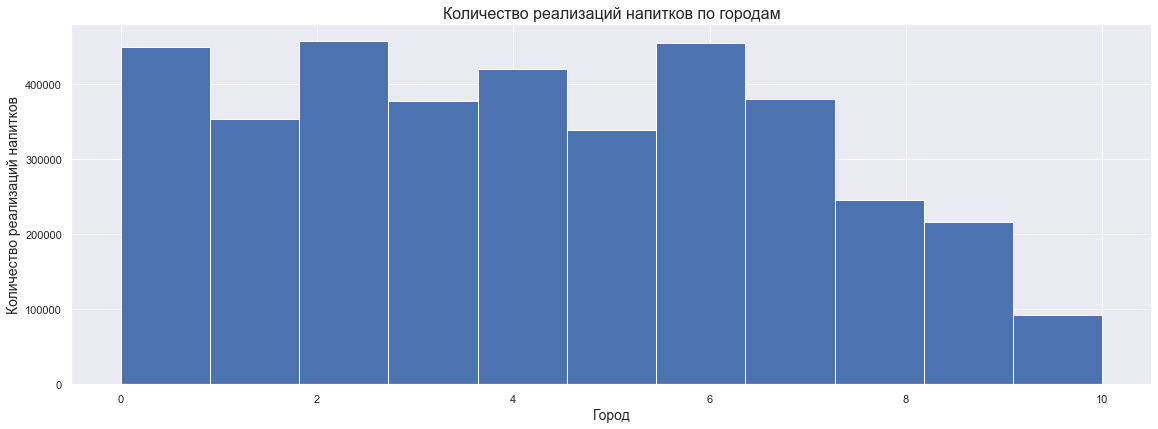

In [8]:
sns.set(rc = {'figure.figsize' : (10,5)})
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(daily_volume_new_df['city'],bins = 11)
axes.set_title('Количество реализаций напитков по городам', fontsize = 16)
axes.set_ylabel('Количество реализаций напитков', fontsize = 14)
axes.set_xlabel('Город', fontsize = 14)

<AxesSubplot:xlabel='Город', ylabel='Количество реализованных литров'>

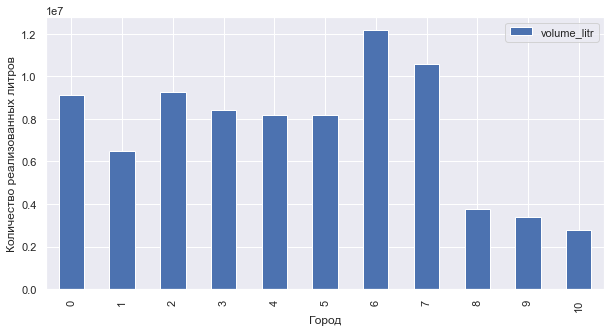

In [9]:
daily_volume_new_df.pivot_table(values = ['volume_litr'], 
                               index = 'city', 
                               aggfunc = 'sum') \
                                        .plot(kind = 'bar', xlabel = 'Город', ylabel = 'Количество реализованных литров')

Резюме: столбец содержит данные о местоположении заведения. Посмотрев на распределение, можем заметить, что наименьшее количество реализованных литров и реализаций было совершено в городах с индексами 8, 9, 10, которые указывают на Абердин, Даффтаун и Лондон. Вероятно, эти города сильнее всего подвержены атакам, что необходимо будет выяснить далее.

## Атрибут 'id' <a name="daily_volume.id"></a>

[К оглавлению](#оглавление)

Атрибут указывает id заведения реализации, посмотрим сколько их всего представлено в таблице, используя модифицированную нами таблицу.

In [10]:
daily_volume_df.id.nunique()

3145660

То, что в таблице представлено 3778274 строк, а уникальных значений заведений 3145660, довольно странно, ведь в таком случае, можно предположить, что у нас есть 632614 случаев неоднократной реализации в одном заведении за предоставленный период. Также важно заметить, что каждая строка передаёт информацию о реализации конкретного напитка. Посмотрим на верхнее и нижнее количество реализаций

In [11]:
daily_volume_df.id.value_counts()

1070568    7
7014227    6
9321479    6
5028772    6
8232793    6
          ..
8351665    1
5189679    1
954338     1
4918136    1
1084505    1
Name: id, Length: 3145660, dtype: int64

Довольно странно, что максимальное количество реализаций за год равняется 7. Ещё раз обратим внимание, что это не дни реализации в целом, а реализация конкретного напитка в определённый день.

Из этого рискну выдвинуть гипотезу, что атрибут id в таблице daily_volume.parquet, не является id заведения. Вероятно, id присваивался по нескольким атрибутам сразу, допустим, что это заведение и дата или заведение и напиток.

Проведя небольшое исследование я выяснил, что пабов в Великобритании на данный момент ≈ 40 тысяч. Учитывая, что паб не единственное место, в котором реализуются алкогольные и безалкогольные напитки, прибавим количество ресторанов, кафе и предприятий «быстрого» питания, которых насчитывается около 50 тысяч.

В результате мы получаем около 90 тысяч точек реализации напитков.

Учитывая, что я обычный магл, количество заведений равное 3145660 в 11 городах для меня кажется очень большим.

Попытаюсь доказать свою теорию. Посмотрим на заведение с id = 1070568:

In [12]:
daily_volume_df[daily_volume_df.id == 1070568]

city       id           product        date  volume_litr
488699     Авимор  1070568    Огненный виски  1996-05-21     1.591781
752205     Авимор  1070568     Чешуя дракона  1996-03-10    19.380124
1165032     Салем  1070568  Смородиновый ром  1996-07-22     1.135743
1762208    Авимор  1070568    Огненный виски  1996-10-16     4.059515
1859506  Коукворт  1070568  Смородиновый ром  1996-10-25     2.067148
2637320    Авимор  1070568    Огненный виски  1997-01-11     9.306953
3578391  Нью-Йорк  1070568     Чешуя дракона  1997-11-05    15.168638

Удивительно, что одно заведение смогло реализовать напитки сразу в нескольких городах. Магия. Однако, возможно, что данный id присвоен франшизе.

Это могло бы сразу опровергнуть теорию о том, что столбец id не является id заведения, но т.к. одно заведение может оказаться в нескольких городах или быть франшизой, почему в таблице есть заведения с одной реализацией за весь год?

Рассмотрим сколько заведений имеют по одной реализации и сколько имеют больше:

In [13]:
count_of_sales_df = pd.concat([(daily_volume_df.id.value_counts() < 2).value_counts().reset_index().T \
                        .rename(columns = {0:'Одна реализация',
                                            1:'Более одной реализации'}).loc['id'],
(daily_volume_df.id.value_counts() < 2).value_counts(normalize = True).reset_index().T \
                        .rename(columns = {0:'Одна реализация',
                                            1:'Более одной реализации'}).loc['id']], axis = 1)

count_of_sales_df.columns = ['count', 'percentage']

count_of_sales_df

count percentage
Одна реализация         2587708   0.822628
Более одной реализации   557952   0.177372

В итоге лишь 17,7 процентов заведений имеют больше одной реализации за весь год. В данном случае я склоняюсь к тому, чтобы убрать этот атрибут из рассмотрения.

Резюме: По описанию таблицы столбец содержит id заведения, в котором был реализован напиток, однако, однозначного мнения по этому столбцу, к сожалению, у меня нет. Слишком странно, что более 2,5 миллионов заведений смогли реализовать за два года лишь один напиток. Предполагаю, что дальнейший анализ даст понять, что делать в этой ситуации.

## Атрибут 'product' <a name="daily_volume.product"></a>

[К оглавлению](#оглавление)

Содержит названия реализованных напитков. Посмотрим, какие именно:

In [14]:
daily_volume_df['product'].unique()

array(['Эгног', 'Смородиновый ром', 'Огненный виски', 'Чешуя дракона',
       'Сливочное пиво', 'Горная вода', 'Языкосвязывающий лимонный сквош',
       'Шипучий персиковый чай', 'Тыквенный сок', 'Настой тыквы'],
      dtype=object)

Посмотрим на количество реализаций конкретного напитка и распределение:

In [15]:
daily_volume_df['product'].value_counts()

Сливочное пиво                     904027
Чешуя дракона                      855383
Огненный виски                     806615
Горная вода                        421291
Языкосвязывающий лимонный сквош    389109
Смородиновый ром                   343400
Шипучий персиковый чай              40051
Тыквенный сок                       11647
Эгног                                5290
Настой тыквы                         1461
Name: product, dtype: int64

Text(0.5, 0, 'Напиток')

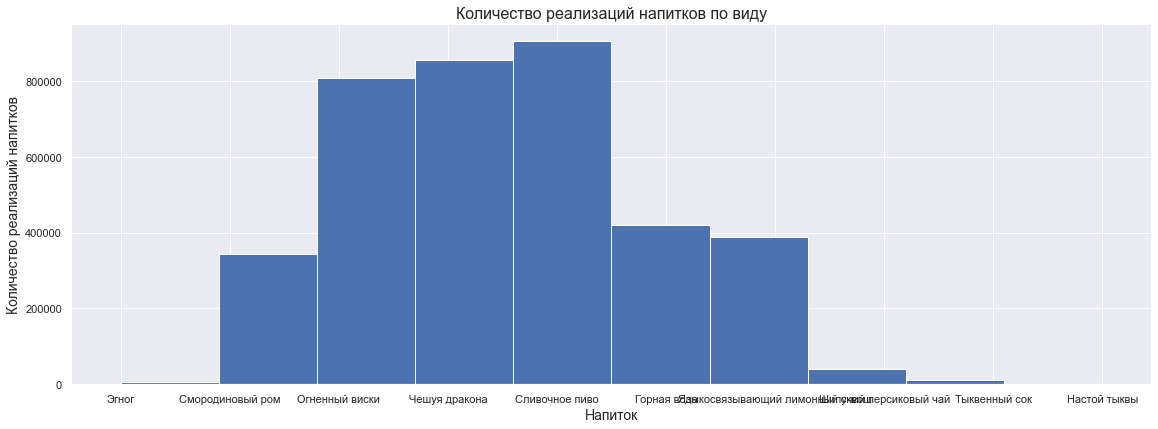

In [16]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(daily_volume_df['product'],bins = 10)
axes.set_title('Количество реализаций напитков по виду', fontsize = 16)
axes.set_ylabel('Количество реализаций напитков', fontsize = 14)
axes.set_xlabel('Напиток', fontsize = 14)

Видим, что некоторые напитки совсем имеют небольшое количество реализаций в сравнении с другими, посмотрим на количество реализованных литров по напиткам

<AxesSubplot:xlabel='Город', ylabel='Количество реализованных литров'>

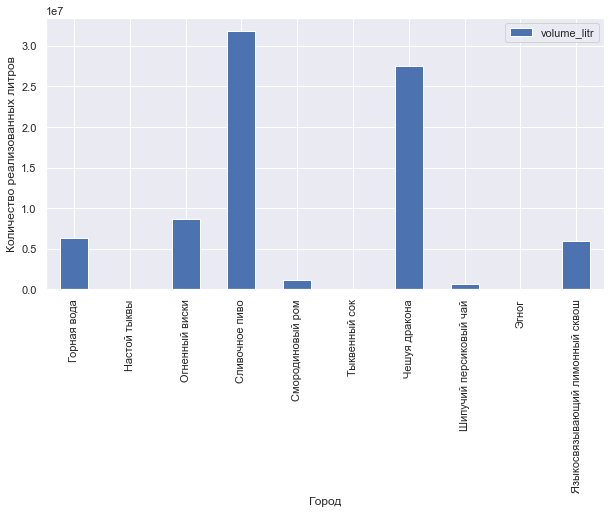

In [17]:
daily_volume_df.pivot_table(values = ['volume_litr'], 
               index = 'product', 
               aggfunc = 'sum').plot(kind = 'bar', xlabel = 'Город', ylabel = 'Количество реализованных литров')

Резюме: количество реализованных литров Тыквенного сока, Эгнога и Настойки тыквы незначительны на фоне других напитков. Вероятно, мы можем убрать их из рассмотрения, т.к. они несут в себе очень мало информации, и следует сфокусироваться на более весомых продуктах, но я принял решение заменить имя напитка на принадлежность к группе алкогольных и безалкогольных напитков с использованием таблицы drinks, т.к. название продуктa не несёт для нас ценности, ввиду того, что его цена не обозначена. Следовательно, за неимением большого количества типов алкогольных и безалкогольных напитков, их цена не должна сильно отличаться друг от друга, к тому же, эти напитки находятся в мире магии.

## Атрибут 'date' <a name="daily_volume.date"></a>

[К оглавлению](#оглавление)

Столбец содержит дату реализации. Посмотрим на распределение:

Text(0, 0.5, 'Количество реализаций напитков')

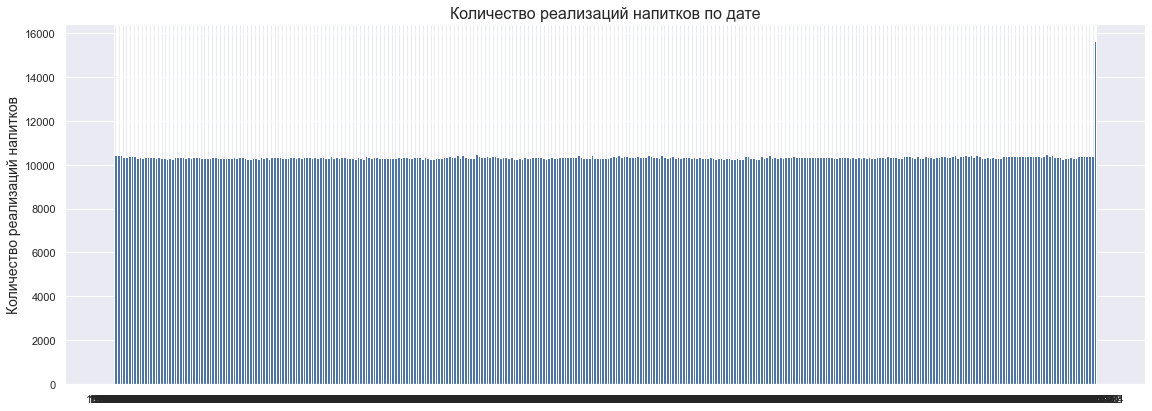

In [18]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(daily_volume_df['date'], bins = 365)
axes.set_title('Количество реализаций напитков по дате', fontsize = 16)
axes.set_ylabel('Количество реализаций напитков', fontsize = 14)

In [19]:
daily_volume_df['date'].value_counts().describe()

count     731.000000
mean     5168.637483
std        26.310708
min      5102.000000
25%      5150.000000
50%      5167.000000
75%      5185.500000
max      5275.000000
Name: date, dtype: float64

Видим, что количества реализаций в определённый день примерно равны друг другу. Среднеквадратичное отклонение мало ( ≈ 0,5% от среднего). Рассмотрим показатели количества реализованных литров:

In [20]:
daily_volume_df.pivot_table(values = ['volume_litr'], 
                           index = 'date', 
                           aggfunc = 'sum').describe()

volume_litr
count     731.000000
mean   112682.743695
std     15232.586194
min     49499.568170
25%    105064.529085
50%    114111.028210
75%    121554.834890
max    163564.258137

Резюме: разбор реализованной продукции по датам невелик, каждый день совершалось примерно одинаковое количество реализаций. Количество реализованных литров тоже имеет допустимый разброс, это заметно по 25квантилю и 75, их отличие около 20 процентов.

## Атрибут 'volume_litr' <a name="daily_volume.volume_litr"></a>

[К оглавлению](#оглавление)

Столбец отображает количество реализованных литров, его зависимость от других атрибутов была рассмотрена ранее, посмотрим на распределение самого атрибута.

In [21]:
daily_volume_df['volume_litr'].describe()

count    3.778274e+06
mean     2.180125e+01
std      1.958118e+01
min      0.000000e+00
25%      6.478835e+00
50%      1.600766e+01
75%      3.199587e+01
max      2.700000e+02
Name: volume_litr, dtype: float64

Text(0.5, 1.0, 'Количество реализованных литров')

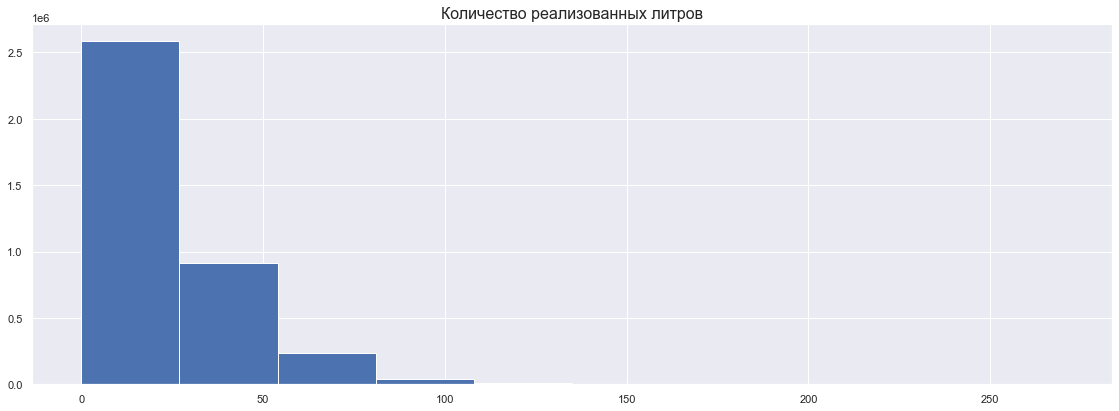

In [22]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(daily_volume_df['volume_litr'])
axes.set_title('Количество реализованных литров', fontsize = 16)

<AxesSubplot:>

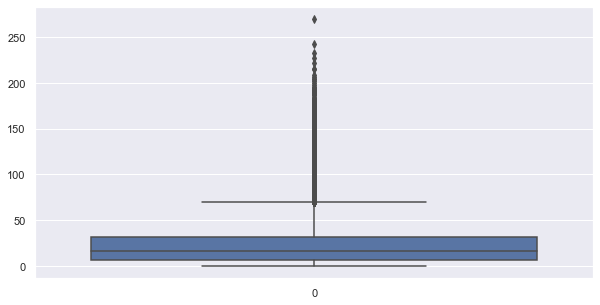

In [23]:
sns.boxplot(data = daily_volume_df['volume_litr'])

Вероятнее всего, распределение соответствует логнормальному:

Text(0.5, 1.0, 'Количество реализованных литров')

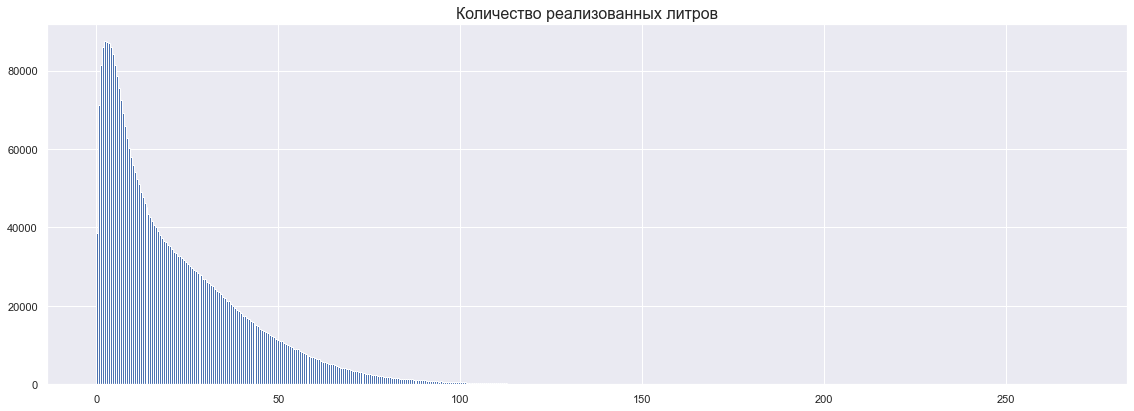

In [24]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(daily_volume_df['volume_litr'], bins = 500)
axes.set_title('Количество реализованных литров', fontsize = 16)

Ярко выраженная положительная ассиметрия.

Cделаем подробный анализ границ и расчитаем их точные значения

25-й перцентиль: 6.4788346162502, 75-й перцентиль: 31.995872679268352, IQR: 25.517038063018152,  Границы выбросов: [-31.79672247827703, 70.27142977379557].


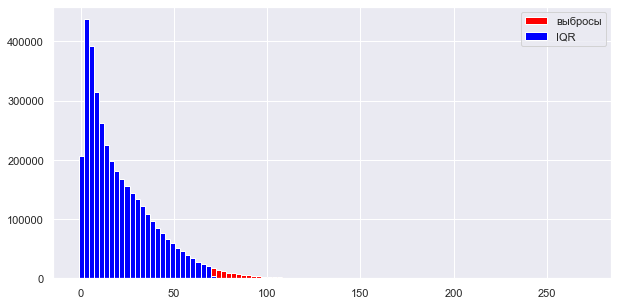

In [25]:
median = daily_volume_df['volume_litr'].median()
IQR = daily_volume_df['volume_litr'].quantile(0.75) - daily_volume_df['volume_litr'].quantile(0.25)
perc25 = daily_volume_df['volume_litr'].quantile(0.25)
perc75 = daily_volume_df['volume_litr'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


daily_volume_df['volume_litr'].loc[daily_volume_df['volume_litr'] <= 270].hist(bins = 100, 
                                  range = (-1, 271), 
                                  color = 'red',
                                  label = 'выбросы')

daily_volume_df['volume_litr'].loc[daily_volume_df['volume_litr'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 100, 
                                                                        range = (-1, 271),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

Можно применить логарифмирование и проверить распределение на логнормальность:

<AxesSubplot:>

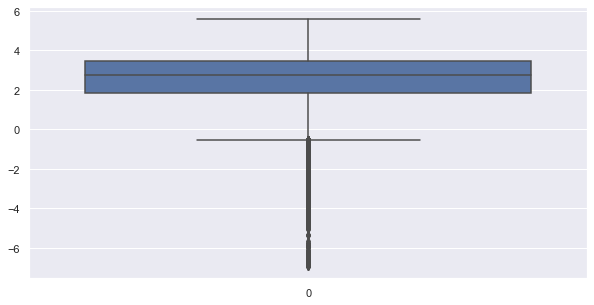

In [26]:
eps = 0.001
sns.boxplot(data = daily_volume_df['volume_litr'].apply(lambda x: np.log(x+eps)))

Выбросы действительно есть, будем ориентироваться по анализу выше.

In [27]:
daily_volume_df = daily_volume_df[daily_volume_df.volume_litr < perc75 + 1.5*IQR]

daily_volume_df

city       id           product        date  volume_litr
0             Коукворт  5429785             Эгног  1997-12-21    13.817442
1             Коукворт  6204483  Смородиновый ром  1997-12-21     2.744815
2               Авимор  8468669  Смородиновый ром  1997-12-21     0.625733
3        Литтл Уингинг  3750132    Огненный виски  1997-12-21     4.666352
4                Салем  7578185  Смородиновый ром  1997-12-21     0.185256
...                ...      ...               ...         ...          ...
3778269         Кромер  8473254    Сливочное пиво  1997-07-24    35.694447
3778270         Кромер   609658    Сливочное пиво  1997-07-24    22.917773
3778271          Париж  1465623    Сливочное пиво  1997-07-24    58.172669
3778272        Абердин  1084505    Сливочное пиво  1997-07-24    34.726299
3778273        Абердин  4874286    Сливочное пиво  1997-07-24    21.534405

[3679269 rows x 5 columns]

### Изменение таблицы daily_volume для дальнейшего использования <a name = 'last_tablica'></a>

[К оглавлению](#оглавление)

Считаю, что в данном случае не несёт никакой информации название напитка, т.к у нас нет их цены. Количество алкогольных напитков невелико, предположу, что разница их стоимости также невелика. Изменим имя столбца на drinks, как в других таблицах, и сменим название столбец на принадлежность к алкогольным и неалкогольным напиткам.

In [28]:
drinks_df = pd.read_parquet('drinks.parquet', engine = 'pyarrow')

drinks_df.index = drinks_df['Напиток']

drinks_df.drop(drinks_df.columns[0], axis = 1, inplace = True)

drinks_df

Тип
Напиток                                        
Языкосвязывающий лимонный сквош  Безалкогольный
Сливочное пиво                      Алкогольный
Шипучий персиковый чай           Безалкогольный
Чешуя дракона                       Алкогольный
Эгног                            Безалкогольный
Тыквенный сок                    Безалкогольный
Огненный виски                      Алкогольный
Настой тыквы                     Безалкогольный
Горная вода                      Безалкогольный
Вода                             Безалкогольный
Смородиновый ром                    Алкогольный

Напишем и применим функцию alco_or_not, которая, используя таблицу drinks, меняет название напитка на его принадлежность к алкогольным: <a name = 'alco_or_not'></a>

In [29]:
def alco_or_not(x):
    global drinks_df
    
    if x == 'Безалкогольное':
        return 0
    elif x == 'Алкогольное':
        return 1
    elif x == 'Алкогольные':
        return 1
    elif x == 'Безалкогольные':
        return 0
    else:
        if drinks_df.loc[x]['Тип'] == 'Безалкогольный':
            return 0
        else:
            return 1

In [30]:
daily_volume_df['product'] = daily_volume_df['product'].apply(alco_or_not)

Переименуем столбец:

In [31]:
daily_volume_df.rename(columns = {'product':'drink'}, inplace = True)

Убираем столбец 'id' из рассмотрения:

In [32]:
daily_volume_df.drop(daily_volume_df.columns[1], axis = 1, inplace = True)

Также хотелось бы объединить строки по городам, датам и принадлежности напитка:

In [33]:
daily_volume_df = daily_volume_df.groupby(['city','drink','date'],as_index = False).agg('sum')

В итоге получаем:

In [34]:
daily_volume_df

city  drink        date  volume_litr
0      Абердин      0  1996-01-01   141.007667
1      Абердин      0  1996-01-02   298.747532
2      Абердин      0  1996-01-03   441.203407
3      Абердин      0  1996-01-04   493.160614
4      Абердин      0  1996-01-05   447.373914
...        ...    ...         ...          ...
16077    Салем      1  1997-12-27  8516.048174
16078    Салем      1  1997-12-28  8829.691585
16079    Салем      1  1997-12-29  9280.386892
16080    Салем      1  1997-12-30  9346.291282
16081    Салем      1  1997-12-31  8715.299401

[16082 rows x 4 columns]

## 2. Таблица с эффектами акций [effect.parquet] <a name="effect"></a>

[К оглавлению](#оглавление)

Выгрузим данные и изучим таблицу

In [35]:
effect_df = pd.read_parquet('effect.parquet',engine = 'pyarrow')

In [36]:
effect_df.head(5)

date           product      city  volume_litr
0  1997-02-06    Огненный виски  Нью-Йорк    73.812644
1  1997-02-06  Смородиновый ром  Нью-Йорк    10.502700
2  1997-02-06    Огненный виски    Кромер   134.363871
3  1997-02-06    Безалкогольное    Авимор     5.823788
4  1997-02-06              Вода    Лондон    60.879819

Столбцы:
 - date - дата расчета эффекта
 - product – напиток
 - city – город
 - volume_litr - объем эффекта в дополнительных литрах

Рассмотрим основные показатели для атрибута volume_litr

In [37]:
effect_df.volume_litr.describe()

count    48942.000000
mean         2.643932
std         22.192502
min          0.000000
25%          0.000009
50%          0.000104
75%          0.000761
max        598.000000
Name: volume_litr, dtype: float64

Изучим таблицу на предмет null-значений

In [38]:
effect_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48942 entries, 0 to 48941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         48942 non-null  object 
 1   product      48942 non-null  object 
 2   city         45138 non-null  object 
 3   volume_litr  48942 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


Пустые значения имеются в столбце 'city', рассмотрим его сразу подробнее:

### Атрибут 'city' <a name="effect.city"></a>

[К оглавлению](#оглавление)

Нужно попытаться заполнить пропуски, попробуем изучить столбец чуть подробнее:

<AxesSubplot:>

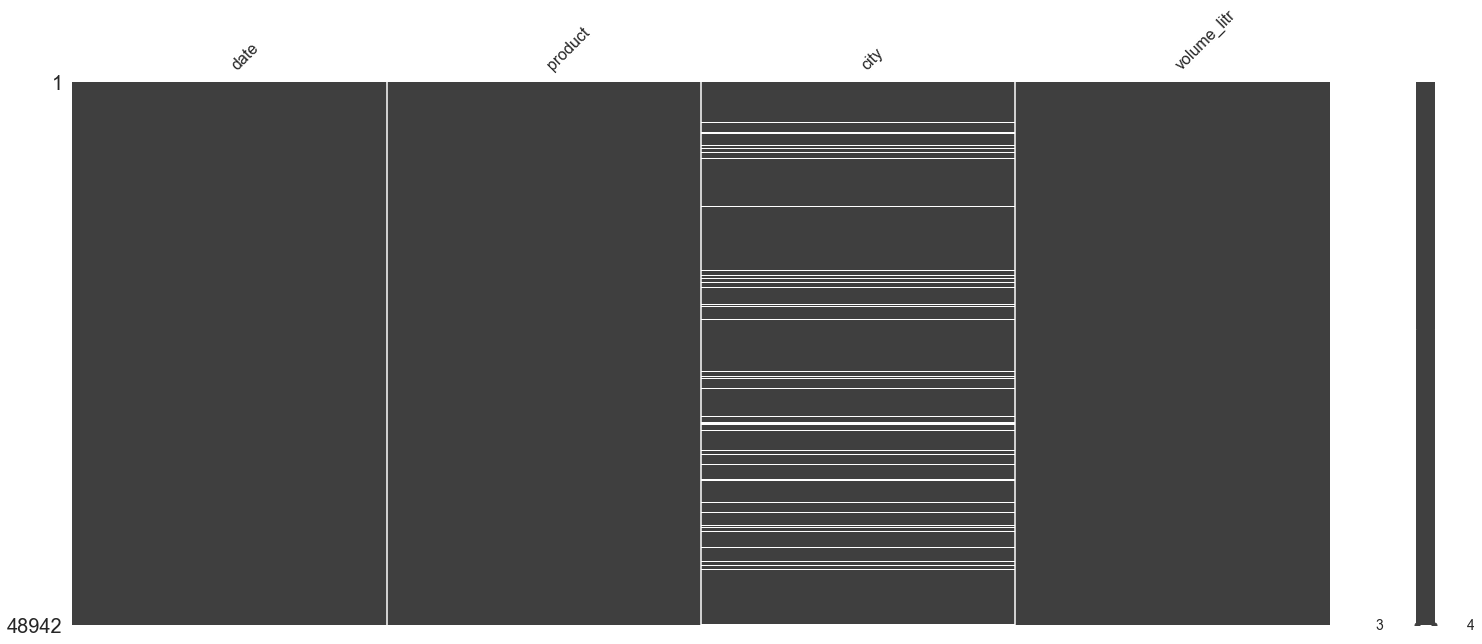

In [39]:
msno.matrix(effect_df)

In [40]:
effect_df['city'].value_counts(dropna = False)

Кромер           4296
Авимор           4296
Бат              4296
Салем            4296
Литтл Уингинг    4296
Коукворт         4296
Нью-Йорк         4029
Париж            3996
Абердин          3915
Даффтаун         3826
None             3804
Лондон           3596
Name: city, dtype: int64

Примечательно, что 5 городов имеют одинаковое значение дополнительных литров

В ячейке выше представлено 12 строк, но в таблице реализации продукции было 11 уникальных городов, следовательно, все строки таблицы effect с пустым значением атрибута города принадлежат другим городам. К тому же, нам это немного подсказывает общее количество строк таблицы 48942/4296 ≈ 11.25. Другого города быть не может. Осталось понять, что делать с пропусками.

Сделаем вот что:  

In [41]:
from sklearn.tree import DecisionTreeClassifier

import time
import datetime

In [42]:
def to_unix(x):
    return time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple())

In [43]:
train_effect_df = effect_df.copy()

train_effect_df.dropna(inplace = True)

train_effect_df['unix_date'] = train_effect_df['date'].apply(to_unix)
train_effect_df['product'] = train_effect_df['product'].apply(alco_or_not)
train_effect_df.rename(columns = {'product':'drink'})

date  drink      city  volume_litr    unix_date
0      1997-02-06      1  Нью-Йорк    73.812644  855176400.0
1      1997-02-06      1  Нью-Йорк    10.502700  855176400.0
2      1997-02-06      1    Кромер   134.363871  855176400.0
3      1997-02-06      0    Авимор     5.823788  855176400.0
4      1997-02-06      0    Лондон    60.879819  855176400.0
...           ...    ...       ...          ...          ...
48936  1997-07-24      1     Салем     0.000642  869691600.0
48937  1997-07-23      1  Даффтаун     0.000766  869605200.0
48938  1997-07-19      1  Даффтаун     4.108817  869259600.0
48940  1997-07-21      1    Кромер     0.000664  869432400.0
48941  1997-07-21      1    Авимор     0.000303  869432400.0

[45138 rows x 5 columns]

[Функция alco_or_not](#alco_or_not)

In [44]:
train_effect_df

date  product      city  volume_litr    unix_date
0      1997-02-06        1  Нью-Йорк    73.812644  855176400.0
1      1997-02-06        1  Нью-Йорк    10.502700  855176400.0
2      1997-02-06        1    Кромер   134.363871  855176400.0
3      1997-02-06        0    Авимор     5.823788  855176400.0
4      1997-02-06        0    Лондон    60.879819  855176400.0
...           ...      ...       ...          ...          ...
48936  1997-07-24        1     Салем     0.000642  869691600.0
48937  1997-07-23        1  Даффтаун     0.000766  869605200.0
48938  1997-07-19        1  Даффтаун     4.108817  869259600.0
48940  1997-07-21        1    Кромер     0.000664  869432400.0
48941  1997-07-21        1    Авимор     0.000303  869432400.0

[45138 rows x 5 columns]

In [45]:
x = train_effect_df[['unix_date', 'product', 'volume_litr']]
y = train_effect_df['city']

In [46]:
cl = DecisionTreeClassifier().fit(x,y)

In [47]:
cl.predict([[869432400.0,1,0.000303]])[0]

'Авимор'

In [48]:
def find_accuracy(x):
    global train_effect_df
    
    func_x = np.array(train_effect_df.iloc[x][['unix_date','product','volume_litr']]).reshape(1, -1)
    
    if cl.predict(func_x)[0] == train_effect_df.iloc[x]['city']:
        return 1
    else: 
        return 0

In [49]:
train_effect_df['true_or_not'] = train_effect_df.reset_index().reset_index().iloc[:,0].apply(find_accuracy)

In [50]:
train_effect_df['true_or_not'].mean()

0.8188800614454071

In [51]:
null_city_effect_df = effect_df[effect_df.city.isna() == True].copy()

In [52]:
null_city_effect_df['unix_date'] = null_city_effect_df['date'].apply(to_unix)
null_city_effect_df['product'] = null_city_effect_df['product'].apply(alco_or_not)

[Функция alco_or_not](#alco_or_not)

In [53]:
def city_predict(x):
    global null_city_effect_df

    func_x = np.array(null_city_effect_df.iloc[x][['unix_date','product','volume_litr']]).reshape(1, -1)
    
    return cl.predict(func_x)[0] 

In [54]:
null_city_effect_df['city'] = null_city_effect_df.reset_index().reset_index().iloc[:,0].apply(city_predict)

In [55]:
null_city_effect_df

date  product      city  volume_litr    unix_date
65     1996-02-10        0     Париж          0.0  823899600.0
108    1996-12-30        1    Авимор          0.0  851893200.0
112    1996-08-14        0     Париж          0.0  839970000.0
145    1997-01-03        1  Даффтаун          0.0  852238800.0
147    1996-10-04        0  Даффтаун          0.0  844376400.0
...           ...      ...       ...          ...          ...
48879  1997-07-23        1       NaN          0.0  869605200.0
48889  1997-07-24        1       NaN          0.0  869691600.0
48897  1997-07-23        1       NaN          0.0  869605200.0
48915  1997-07-21        1       NaN          0.0  869432400.0
48939  1997-07-24        1       NaN          0.0  869691600.0

[3804 rows x 5 columns]

In [56]:
null_city_effect_df.city.value_counts(dropna = False)

NaN         3558
Авимор        83
Париж         68
Даффтаун      20
Абердин       18
Нью-Йорк      18
Бат           14
Лондон        12
Кромер         8
Салем          5
Name: city, dtype: int64

К сожалению, после работы модели я заметил, что количество литров во всех строках с отсутствующими городами равно нулю. Вероятно, из-за этого модель и сработала некорректно, т.к. работала только по бинарному атрибуту product.

Сомневаюсь, что заполнение пропусков модой сможет дать нам правильную картину данных, но с другой стороны очень не хотелось бы лишать себя почти 8% строк.

И всё же я предпочту удалить строки, возможно, существует решение лучше, но мне оно пока недоступно.

Эти строки могли бы означать атаку на город, ввиду которой данные не сохранились

Удалим пустые значения, преобразуем столбец product к виду drink, как мы сделали в таблице daily_volume и объединим таблицу по городу, дате и принадлежности к алкогольной продукции:

In [62]:
effect_df = pd.read_parquet('effect.parquet', engine = 'pyarrow')
effect_df = effect_df.dropna()

effect_df['product'] = effect_df['product'].apply(alco_or_not)
effect_df.rename(columns = {'product':'drink'}, inplace = True)

effect_df = effect_df.groupby(['date','drink','city'], as_index = False).agg('sum')

[Функция alco_or_not](#alco_or_not)

В итоге получаем:

In [63]:
effect_df

date  drink           city  volume_litr
0      1996-01-01      0        Абердин     0.000011
1      1996-01-01      0         Авимор     0.000026
2      1996-01-01      0            Бат     0.000164
3      1996-01-01      0       Даффтаун     0.241666
4      1996-01-01      0       Коукворт     0.000063
...           ...    ...            ...          ...
15747  1997-12-31      1  Литтл Уингинг     0.000088
15748  1997-12-31      1         Лондон     0.000092
15749  1997-12-31      1       Нью-Йорк     0.000095
15750  1997-12-31      1          Париж     0.000091
15751  1997-12-31      1          Салем     0.000087

[15752 rows x 4 columns]

C другими столбцами проделаем тоже, что и с аналогичными столбцами из прошлой таблицы

### Атрибут 'product' <a name="effect.product"></a>

[К оглавлению](#оглавление)

Посмотрим на количество реализаций конкретного типа напитка:

In [65]:
effect_df['drink'].value_counts()

0    7876
1    7876
Name: drink, dtype: int64

Text(0.5, 0, 'Напиток')

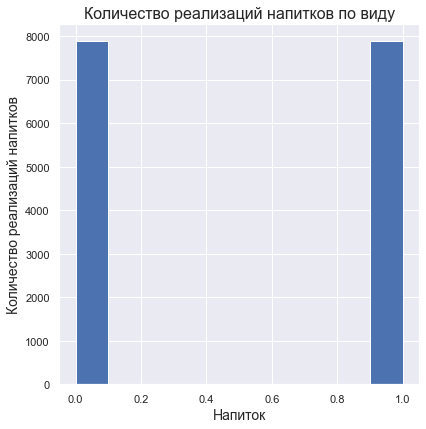

In [69]:
fig = plt.figure(figsize = [5,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(effect_df['drink'],bins = 10)
axes.set_title('Количество реализаций напитков по виду', fontsize = 16)
axes.set_ylabel('Количество реализаций напитков', fontsize = 14)
axes.set_xlabel('Напиток', fontsize = 14)

Видим, что количество реализаций одинаково по типу напитка

<AxesSubplot:xlabel='Город', ylabel='Количество реализованных литров'>

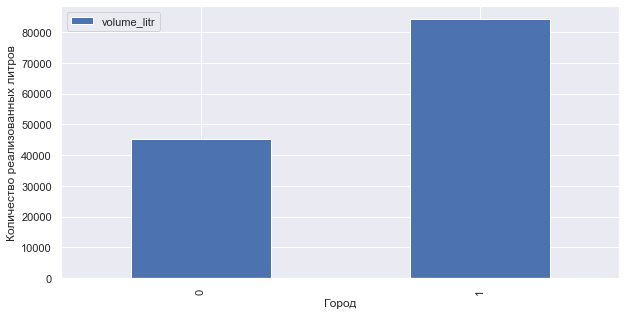

In [71]:
effect_df.pivot_table(values = ['volume_litr'], 
               index = 'drink', 
               aggfunc = 'sum').plot(kind = 'bar', xlabel = 'Город', ylabel = 'Количество реализованных литров')

По дополнительным литрам также преобладают алкогольные напитки

Резюме: по результатам дополнительных реализаций с помощью акций преобладают алкогольные напитки

### Атрибут 'date' <a name="effect.date"></a>

[К оглавлению](#оглавление)

Столбец содержит дату реализации. Посмотрим на распределение:

Text(0, 0.5, 'Количество дополнительных реализаций напитков')

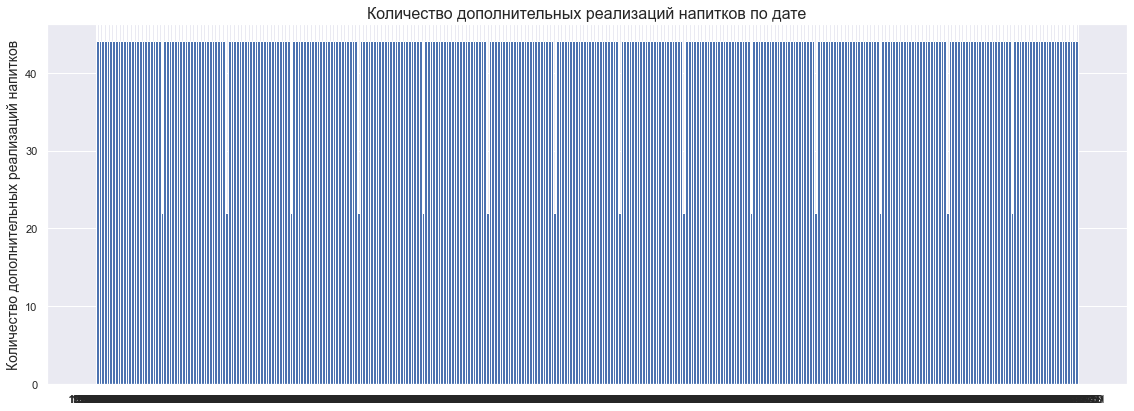

In [72]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(effect_df['date'], bins = 365)
axes.set_title('Количество дополнительных реализаций напитков по дате', fontsize = 16)
axes.set_ylabel('Количество дополнительных реализаций напитков', fontsize = 14)

In [73]:
effect_df['date'].value_counts().describe()

count    716.0
mean      22.0
std        0.0
min       22.0
25%       22.0
50%       22.0
75%       22.0
max       22.0
Name: date, dtype: float64

Видим, что количества реализаций в определённый день примерно равны друг другу. Среднеквадратичное отклонение мало ( ≈ 2% от среднего). Рассмотрим показатели количества реализованных литров:

<AxesSubplot:xlabel='date'>

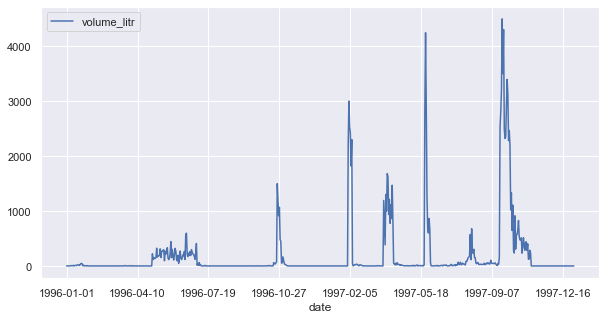

In [74]:
effect_df.pivot_table(values = ['volume_litr'], 
                      index = 'date', 
                      aggfunc = 'sum').plot()

Резюме: некоторые акции очень хорошо сказались на дополнительных реализованных литрах, мы видим семь интервалов, которые могут говорить об успешности акций проведённых в то время, а может быть о пересечении сроков проводимых акций.

### 3. Таблица с реализацией напитков клиентам [sales.parquet] <a name="sales"></a>

[К оглавлению](#оглавление)

Столбцы:
 - date - дата реализации
 - drink – напиток
 - city – город
 - segment - группа клиентов
 - volume_litr - объем в литрах

In [76]:
sales_df = pd.read_parquet('sales.parquet',engine = 'pyarrow')

sales_df.head()

date           drink           city            segment  volume_litr
0  1996-01-01  Безалкогольные       Коукворт      Орден Феникса     3.762379
1  1996-01-01     Алкогольные  Литтл Уингинг  Пожиратели смерти    17.377532
2  1996-01-01     Алкогольные        Абердин      Орден Феникса    41.229288
3  1996-01-01     Алкогольные       Коукворт      Орден Феникса   116.523241
4  1996-01-01     Алкогольные       Коукворт  Пожиратели смерти    12.651664

In [77]:
sales_df.describe()

volume_litr
count  32164.000000
mean      62.013843
std       77.595226
min        0.000000
25%       12.939240
50%       27.005176
75%       62.482043
max      377.000000

Увидев максимальное значение volume_litr в этой таблице, мы отвечаем на поставленный вопрос 1. Добавочные литры из таблицы effect не включены в таблицу daily_volume. 

Проверим наличие пустых значений в таблице:

In [78]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32164 entries, 0 to 32163
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         32164 non-null  object 
 1   drink        32164 non-null  object 
 2   city         32164 non-null  object 
 3   segment      32164 non-null  object 
 4   volume_litr  32164 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


Пустые значения отсутствуют, можно переходить к анализу столбцов.

### Атрибут 'date' <a name="sales.date"></a>

[К оглавлению](#оглавление)

Столбец содержит дату реализации. Посмотрим на распределение:

Text(0, 0.5, 'Количество дополнительных реализаций напитков')

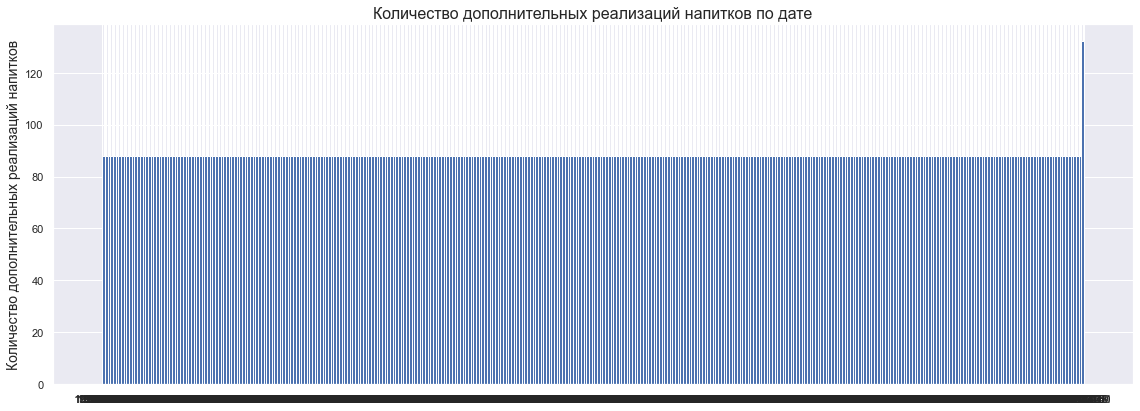

In [79]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(sales_df['date'], bins = 365)
axes.set_title('Количество дополнительных реализаций напитков по дате', fontsize = 16)
axes.set_ylabel('Количество дополнительных реализаций напитков', fontsize = 14)

In [80]:
sales_df['date'].value_counts().value_counts()

44    731
Name: date, dtype: int64

Видим, что количества реализаций в определённый день равны друг другу. То есть в каждом городе ежедневно реализовывались оба типа напитков обоим сегментам. Посмотрим на реализацию литров:

<AxesSubplot:xlabel='Дата'>

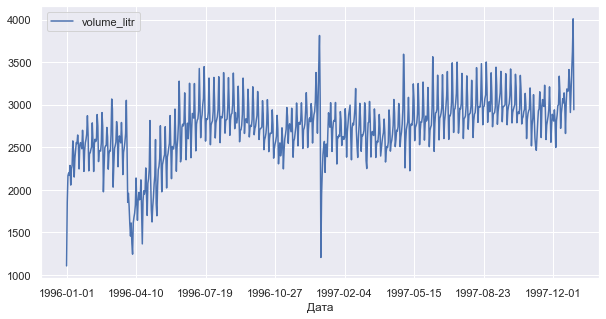

In [81]:
sales_df.pivot_table(values = ['volume_litr'], 
                           index = 'date', 
                           aggfunc = 'sum').plot(xlabel = 'Дата')

Резюме: посмотрев на график с распределением реализованных литров, можно заметить некоторую сезонность:  
 - в самом начале года реализация минимальная;  
 - затем она приходит в норму, немного падая в марте;  
 - с апреля начинается рост, который затухает с августа и начинает вплоть до декабря;  
 - в декабре видно невероятно большой рост реализации и максимальное значение в последний день года.  

### Атрибут 'drink' <a name="sales.drink"></a>

[К оглавлению](#оглавление)

In [82]:
sales_df['drink'].value_counts()

Безалкогольные    16082
Алкогольные       16082
Name: drink, dtype: int64

Воспользуемся функцией alco_or_not и приведём к уже стандартному виду напитки: 

In [83]:
sales_df['drink'] = sales_df['drink'].apply(alco_or_not)

[Функция alco_or_not](#alco_or_not)

In [84]:
sales_df

date  drink           city            segment  volume_litr
0      1996-01-01      0       Коукворт      Орден Феникса     3.762379
1      1996-01-01      1  Литтл Уингинг  Пожиратели смерти    17.377532
2      1996-01-01      1        Абердин      Орден Феникса    41.229288
3      1996-01-01      1       Коукворт      Орден Феникса   116.523241
4      1996-01-01      1       Коукворт  Пожиратели смерти    12.651664
...           ...    ...            ...                ...          ...
32159  1997-12-31      1       Даффтаун  Пожиратели смерти     9.810075
32160  1997-12-31      0          Париж      Орден Феникса    30.091516
32161  1997-12-31      0  Литтл Уингинг  Пожиратели смерти    14.053638
32162  1997-12-31      1       Даффтаун      Орден Феникса   108.492764
32163  1997-12-31      0          Салем      Орден Феникса    23.759206

[32164 rows x 5 columns]

<AxesSubplot:xlabel='drink', ylabel='Количество реализованных литров'>

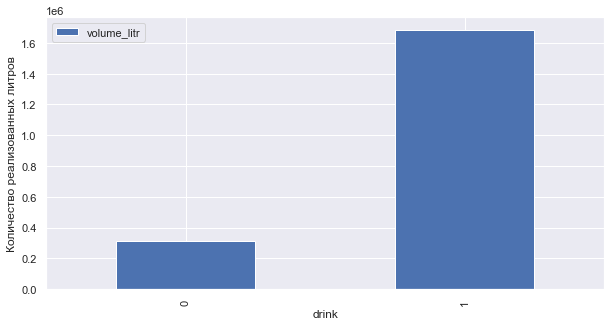

In [85]:
sales_df.pivot_table(values = ['volume_litr'], 
                           index = 'drink', 
                           aggfunc = 'sum').plot(kind = 'bar', ylabel = 'Количество реализованных литров')

Резюме: как было сказано раньше ежедневно реализуются оба вида напитка. По количеству литров преобладают алкогольные напитки

### Атрибут 'city' <a name="sales.city"></a>

[К оглавлению](#оглавление)

In [86]:
sales_df['city'].value_counts()

Коукворт         2924
Литтл Уингинг    2924
Абердин          2924
Лондон           2924
Бат              2924
Даффтаун         2924
Авимор           2924
Кромер           2924
Париж            2924
Салем            2924
Нью-Йорк         2924
Name: city, dtype: int64

Каждый город представлен одинаковое количество раз, что подтверждает, что каждый день в каждом городе реализация происходила двум сегментам клиентов и двух категорий напитков. (2924 = 731(количество дней) * 2(количество сегментов) * 2(количество типов продукции))

Посмотрим распределение по литрам:

<AxesSubplot:xlabel='city', ylabel='Количество реализованных литров'>

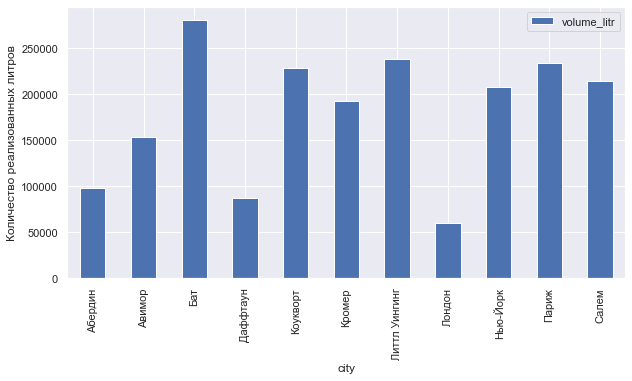

In [87]:
sales_df.pivot_table(values = ['volume_litr'], 
                           index = 'city', 
                           aggfunc = 'sum').plot(kind = 'bar', ylabel = 'Количество реализованных литров')

Резюме: как и в таблице daily_volume у нас есть три города, которые имеют низкий показатель реализации, стоит обратить на это внимание. Следующая таблица attack_probability, в которой мы и изучим этот вопрос.

### Атрибут 'segment' <a name="sales.segment"></a>

[К оглавлению](#оглавление)

In [88]:
sales_df.segment.value_counts()

Орден Феникса        16082
Пожиратели смерти    16082
Name: segment, dtype: int64

Посмотрим по количеству реализованных литров:

<AxesSubplot:xlabel='segment', ylabel='Количество реализованных литров'>

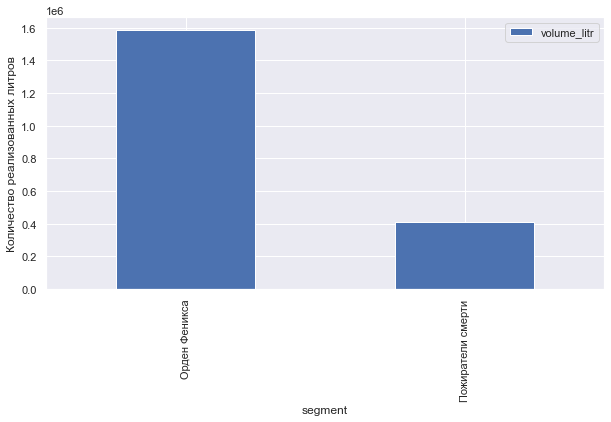

In [89]:
sales_df.pivot_table(values = ['volume_litr'], 
                           index = 'segment', 
                           aggfunc = 'sum').plot(kind = 'bar', ylabel = 'Количество реализованных литров')

Посмотрим, кто чаще посещал заведения по городам:

<AxesSubplot:xlabel='city', ylabel='Количество реализованных литров'>

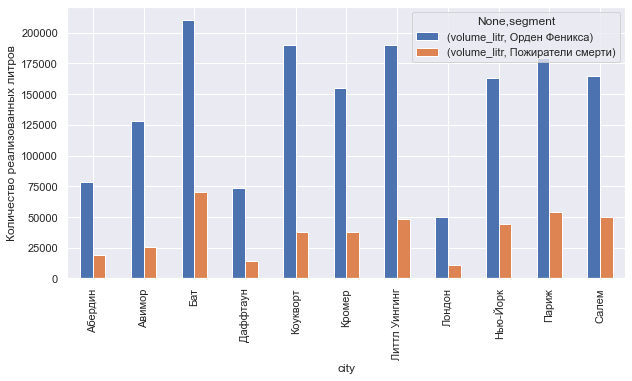

In [90]:
sales_df.pivot_table(values = ['volume_litr'],
                           columns = 'segment',
                           index = 'city', 
                           aggfunc = 'sum').plot(kind = 'bar', ylabel = 'Количество реализованных литров')

Резюме: выходит, что пожиратели смерти посещают заведения гораздо реже, и приобретают напитки тоже. Была гипотеза о том, что после совершённой атаки в заведения заходят те, кто сейчас управляет городом, но теперь мне кажется, что она не имеет места быть в задаче.

### Атрибут 'volume_litr' <a name="sales.volume_litr"></a>

[К оглавлению](#оглавление)

In [91]:
sales_df['volume_litr'].describe()

count    32164.000000
mean        62.013843
std         77.595226
min          0.000000
25%         12.939240
50%         27.005176
75%         62.482043
max        377.000000
Name: volume_litr, dtype: float64

Text(0.5, 1.0, 'Количество реализованных литров')

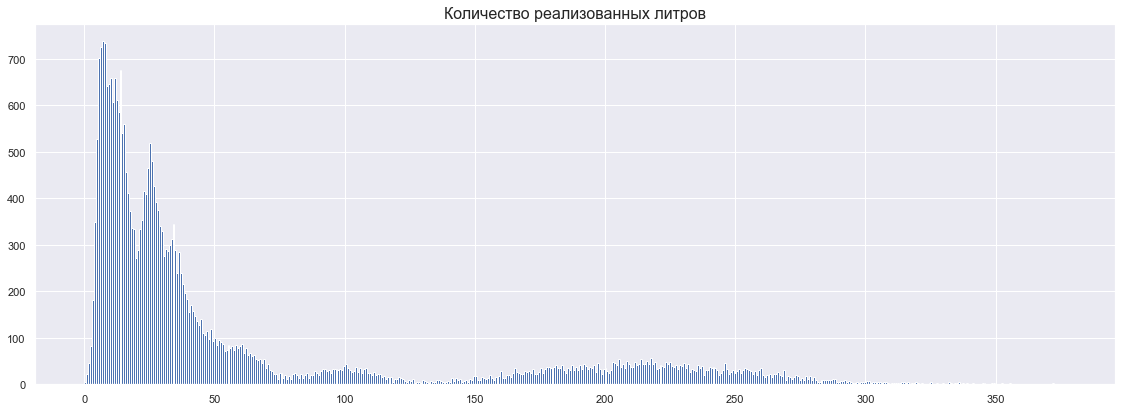

In [93]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(sales_df['volume_litr'], bins = 500)
axes.set_title('Количество реализованных литров', fontsize = 16)

Если честно, никогда не работал с таким распределением, попробуем найти выбросы:

In [ ]:
sns.boxplot(data = sales_df['volume_litr'])

Cделаем подровный анализ границ и расчитаем их точные значения

In [ ]:
median = sales_df['volume_litr'].median()
IQR = sales_df['volume_litr'].quantile(0.75) - sales_df['volume_litr'].quantile(0.25)
perc25 = sales_df['volume_litr'].quantile(0.25)
perc75 = sales_df['volume_litr'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


sales_df['volume_litr'].loc[sales_df['volume_litr'] <= 377].hist(bins = 100, 
                                  range = (-1, 378), 
                                  color = 'red',
                                  label = 'выбросы')

sales_df['volume_litr'].loc[sales_df['volume_litr'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 100, 
                                                                        range = (-1, 378),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

Резюме: т.к. мне не хватает знаний для описания данного распределения, я рискну предположить, что для данного типа распределения выбросы находятся другими способами, и оставлю их в рассмотрении.

Прошу по возможности подсказать по поводу распределения в обратной связи

## 4. Таблица с вероятностью нападения [attack_probability.parquet] <a name="attack_probability"></a>

[К оглавлению](#оглавление)

Столбцы
 - city – город
 - date – дата
 - attack probability - вероятность нападения (членов Ордена Фениса или пожирателей
смерти)


Работая с этой таблицей хочется ответить на вопрос о том, как определить была ли совершена атака, или нет.

In [94]:
attack_probability = pd.read_parquet('attack_probability.parquet',engine = 'pyarrow',)

In [95]:
attack_probability.drop(attack_probability.columns[:1], axis = 1, inplace = True)
attack_probability.rename(columns = {'attack probability':'attack_probability'}, inplace = True)
attack_probability.head(5)

city        date  attack_probability
0  Коукворт  1996-02-23            0.163317
1  Коукворт  1996-02-24            0.219221
2  Коукворт  1996-02-25            0.180625
3  Коукворт  1996-02-26            0.149749
4  Коукворт  1996-02-27            0.121288

In [96]:
attack_probability.describe()

attack_probability
count         3685.000000
mean             0.272010
std              0.198836
min              0.000000
25%              0.120603
50%              0.204634
75%              0.356784
max              1.000000

In [97]:
attack_probability['attack_probability'].value_counts(bins = 4)

(-0.002, 0.25]    2163
(0.25, 0.5]        975
(0.5, 0.75]        419
(0.75, 1.0]        128
Name: attack_probability, dtype: int64

Всё ещё стоит вопрос о том, как понять, была ли совершена атака или нет. Исследуем атрибуты таблицы:

In [99]:
attack_pivot = attack_probability.pivot_table(values = ['attack_probability'],
                           columns = 'city',
                           index = 'date', 
                           aggfunc = 'mean')

attack_pivot

attack_probability                                          \
city                  Абердин    Авимор       Бат  Даффтаун  Коукворт   
date                                                                    
1996-02-23           0.145729  0.183417  0.193826  0.198492  0.163317   
1996-02-24           0.197236  0.237437  0.235104  0.248744  0.219221   
1996-02-25           0.163037  0.201284  0.210816  0.209659  0.180625   
1996-02-26           0.135678  0.172362  0.185858  0.178392  0.149749   
1996-02-27           0.110096  0.148698  0.164067  0.149612  0.121288   
...                       ...       ...       ...       ...       ...   
1997-01-18           0.141541  0.252094  0.238873  0.201843  0.200168   
1997-01-19           0.148470  0.263819  0.244012  0.210370  0.207629   
1997-01-20           0.156784  0.270854  0.253195  0.220603  0.213065   
1997-01-21           0.163037  0.267728  0.263859  0.221385  0.215801   
1997-01-22           0.170854  0.259422  0.273421  0.209171  0.219221   

                                                                            
city          Кромер Литтл Уингинг    Лондон  Нью-Йорк     Париж     Салем  
date                                                                        
1996-02-23  0.185930      0.193467  0.128141  0.206030  0.193467  0.183417  
1996-02-24  0.244975      0.251884  0.177136  0.258794  0.252513  0.239322  
1996-02-25  0.208822      0.211334  0.140983  0.221664  0.216360  0.204634  
1996-02-26  0.176382      0.175377  0.105025  0.188442  0.183920  0.173367  
1996-02-27  0.149840      0.149155  0.075605  0.161261  0.157378  0.144587  
...              ...           ...       ...       ...       ...       ...  
1997-01-18  0.247906      0.139028  0.200586  0.206030  0.337521  0.217337  
1997-01-19  0.255368      0.149155  0.206715  0.212426  0.342851  0.227730  
1997-01-20  0.264322      0.157789  0.221106  0.216583  0.349246  0.236683  
1997-01-21  0.275265      0.168342  0.238693  0.221664  0.357063  0.243719  
1997-01-22  0.288945      0.181533  0.260678  0.228015  0.362437  0.252513  

[335 rows x 11 columns]

### 5. Таблица с описанием акций [promo.parquet] <a name="promo"></a>

[К оглавлению](#оглавление)

Столбцы:
 - Название - наименование акции
 - Начало - дата начала акции
 - Конец - дата окончания акции
 - Dummy-столбцы с присутствием акции в определенном городе
 - Dummy-столбцы, обозначающий, алкогольный ли напиток
 - Затраты на акцию, галлеонов - затраты на акцию в галлеонах

In [100]:
promo_df = pd.read_parquet('promo.parquet',engine='pyarrow')

In [101]:
promo_df.head(5)

Название      Начало       Конец  Кромер  Париж  \
0  Турнир трех волшебников за метлы  1996-03-02  1996-04-05     1.0    1.0   
1                  Клинок за пророк  1997-03-09  1997-04-18     1.0    0.0   
2                   Квоффл в кольцо  1997-06-11  1997-07-25     1.0    1.0   
3                              None  1996-01-01  1996-02-29     1.0    1.0   
4                 Конфетки за метки  1996-04-04  1996-04-30     0.0    1.0   

   Бат  Лондон  Салем  Коукворт  Авимор  Даффтаун  Абердин  Нью-Йорк  \
0  1.0     1.0    1.0       0.0     1.0       1.0      1.0       1.0   
1  1.0     0.0    0.0       1.0     1.0       1.0      0.0       0.0   
2  1.0     0.0    1.0       1.0     0.0       1.0      1.0       1.0   
3  1.0     1.0    1.0       1.0     1.0       1.0      1.0       0.0   
4  1.0     0.0    1.0       1.0     0.0       1.0      1.0       0.0   

   Литтл Уингинг  Алкогольное  Безалкогольное  Затраты на акцию, галлеонов  
0            1.0          1.0             1.0                 78215.000000  
1            1.0          0.0             1.0                 60914.023417  
2            0.0          1.0             0.0                    56.398993  
3            1.0          1.0             1.0                  1292.139684  
4            0.0          1.0             1.0                 36958.812310

In [102]:
promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Название                     61 non-null     object 
 1   Начало                       65 non-null     object 
 2   Конец                        65 non-null     object 
 3   Кромер                       65 non-null     float64
 4   Париж                        65 non-null     float64
 5   Бат                          65 non-null     float64
 6   Лондон                       65 non-null     float64
 7   Салем                        65 non-null     float64
 8   Коукворт                     65 non-null     float64
 9   Авимор                       65 non-null     float64
 10  Даффтаун                     65 non-null     float64
 11  Абердин                      65 non-null     float64
 12  Нью-Йорк                     65 non-null     float64
 13  Литтл Уингинг         

In [103]:
promo_df['Затраты на акцию, галлеонов'].describe()

count       29.000000
mean     11129.860589
std      21170.845797
min          0.000000
25%         56.398993
50%        644.072881
75%       2959.650102
max      78215.000000
Name: Затраты на акцию, галлеонов, dtype: float64

Видим, что больше половина столбца затрат отсутствует.

Рассмотрим варианты:

1. Удалить строки: категорически нельзя терять такое количество данных;
2. Заполнить средним: среднее может не в полной степени соответствовать представлению о данных, максимальное значение 78215, а четверть значений находится ниже 56.
3. Заполнить медианой: то, что, наверняка, является правильным.

In [104]:
promo_df['Затраты на акцию, галлеонов'] = \
            promo_df['Затраты на акцию, галлеонов'].apply(lambda x: promo_df['Затраты на акцию, галлеонов'].median())

In [105]:
promo_df.head()

Название      Начало       Конец  Кромер  Париж  \
0  Турнир трех волшебников за метлы  1996-03-02  1996-04-05     1.0    1.0   
1                  Клинок за пророк  1997-03-09  1997-04-18     1.0    0.0   
2                   Квоффл в кольцо  1997-06-11  1997-07-25     1.0    1.0   
3                              None  1996-01-01  1996-02-29     1.0    1.0   
4                 Конфетки за метки  1996-04-04  1996-04-30     0.0    1.0   

   Бат  Лондон  Салем  Коукворт  Авимор  Даффтаун  Абердин  Нью-Йорк  \
0  1.0     1.0    1.0       0.0     1.0       1.0      1.0       1.0   
1  1.0     0.0    0.0       1.0     1.0       1.0      0.0       0.0   
2  1.0     0.0    1.0       1.0     0.0       1.0      1.0       1.0   
3  1.0     1.0    1.0       1.0     1.0       1.0      1.0       0.0   
4  1.0     0.0    1.0       1.0     0.0       1.0      1.0       0.0   

   Литтл Уингинг  Алкогольное  Безалкогольное  Затраты на акцию, галлеонов  
0            1.0          1.0             1.0                   644.072881  
1            1.0          0.0             1.0                   644.072881  
2            0.0          1.0             0.0                   644.072881  
3            1.0          1.0             1.0                   644.072881  
4            0.0          1.0             1.0                   644.072881

Название акции вряд ли несёт какой-то смысл для нас, мы не можем понять что-то из названия "Квофл в кольцо", поэтому заменим его на обычные индексы, проверив, не было ли повторяющихся акций

In [106]:
promo_df['Название'].value_counts(dropna = False)

С литрушки на лягушку                                                                  12
С литрушки на лягушку + Карликовые пушистики                                            5
None                                                                                    4
(Орден Феникса)                                                                         2
Турнир трех волшебников за метлы                                                        1
Гринготс разный пол (без чар, трансфигурации и оборотного зелья)                        1
Библиотеки Куокворта читательский скидка                                                1
С литрушки на лягушку 12 литров                                                         1
С литрушки на лягушку 16 литров                                                         1
Минус кнат на Чешую Дракона если бармен под чарами                                      1
Выпить на удачу                                                                         1
Напиток и 

Проведём некоторые работы:
 - акции "С литрушки на лягушку" имеют ещё несколько вариаций, например, "С литрушки на лягушку 16 литров", все их объединим в одну группу акций;
 - с акциями "Сладкий бизнес", "Флориш и Блоттс", "Партнер заведений магазин Ханидьюкс" и "Библиотеки Куокворта" также;
 - в случае пустых значений и значения "(Орден Феникса)" будем считать, что каждая акция уникальна.

In [107]:
name_counter = 4

def name_func(x):
    
    global promo_df, name_counter

    if 'С литрушки на лягушку' in str(x):
        return 0
    elif "Сладкий бизнес" in str(x):
        return 1
    elif "Флориш и Блоттс" in str(x):
        return 2
    elif "Партнер заведений магазин Ханидьюкс" in str(x):
        return 3
    elif "Библиотеки Куокворта" in str(x):
        return 4
    else:
        name_counter += 1
        return name_counter

In [108]:
promo_df['Название'] = promo_df['Название'].apply(name_func)

promo_df['Название'].unique()

array([ 5,  6,  7,  8,  9, 10, 11,  1, 12, 13, 14, 15, 16, 17,  3, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27,  0,  4, 28, 29, 30, 31, 32, 33, 34,
        2, 35, 36, 37, 38, 39], dtype=int64)

Отлично, теперь, когда мы изучили и обработали данные, можем приступать к ответу на вопрос.

# 2. Решение <a name = 'решение'></a>

[К оглавлению](#оглавление)

Я считаю, что оценка хорошей акции должна складываться из нескольких параметров:

1. Дополнительные литры на затраты.
2. Количество атак во время проведения акции и то, как атаки влияли на реализацию.
3. Отношение реализованной безалкогольной продукции к алкогольной.
  
Каждый из этих показателей я добавлю к датафрейму promo_df.  

1. Дополнительные литры на затраты.

У нас нет данных о стоимости каждого литра продукции, как я и отмечал ранее, их стоимость, на мой взгляд, не должна сильно различаться. Ввиду этого, можем разделить напитки на две группы (алкогольная продукция и безалкогольная). И сделать вывод на основании их отношения.  
Как посчитать:  
  1. Необходимо разделить акции, идущие в одном городе в одно и тоже время;
  2. Понять, в каком отношении акции приносили дополнительные литры.

2. Количество атак во время проведения акции и то, как атаки влияли на реализацию.

Во время атаки пострадать кроме продаж могут ещё и клиенты и сама продукция, закупленная для проведения акции, что значительно снизит прибыль от проведения акции
Как посчитать:  
  1. Необходимо определить критерии, по которым можно будет с уверенностью сказать, что в данном городе, в данное время происходила атака.
  2. Изучить реализацию после атаки.

3. Отношение реализованной безалкогольной продукции к алкогольной.

Очевидно, что горная вода будет стоить в разы дешевле, чем огненный виски.  

## Дополнительные литры на затраты. <a name = 'дополнительные_затраты'></a> 

[К оглавлению](#оглавление)

Суммируем все дополнительно реализованные литры во время акции.

Первоначально необходимо понять как разделить акции, если они проходят в одно время в одном городе. Посмотрим сколько акций проходят в одно время. Переведём даты в unixtime:

In [112]:
def to_unix(x):
    return time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple())

In [114]:
ready_df = promo_df.copy()

ready_df['Начало'] = ready_df['Начало'].apply(to_unix)
ready_df['Конец'] = ready_df['Конец'].apply(to_unix)

In [ ]:
promo_dates_dict = {}

for column in range(4,14):
    
    promo_dates_dict[column] = []
    
    for id in promo_df.reset_index().iloc[:,0]:
        if promo_df.reset_index().iloc[id,column] == 1:
            promo_dates_dict[column].append(id)
            
promo_dates_dict

In [ ]:
new_dict = {4:[]}

for row in promo_dates_dict[4]:
    for next_row in promo_dates_dict[4]:
        if row == next_row:
            continue
        else:
            if ((ready_df.iloc[row]['Начало'] <= ready_df.iloc[next_row]['Начало'] <= ready_df.iloc[row]['Конец']) \
                    or (ready_df.iloc[row]['Начало'] <= ready_df.iloc[next_row]['Конец'] <= ready_df.iloc[row]['Конец'])) \
            and ((ready_df.iloc[row]['Алкогольное'] == ready_df.iloc[next_row]['Алкогольное']) or \
                (ready_df.iloc[row]['Безалкогольное'] == ready_df.iloc[next_row]['Безалкогольное'])):
                if [next_row, row] not in new_dict[4]:
                    new_dict[4].append([row,next_row])
                
new_dict

In [64]:
effect_df

date  drink           city  volume_litr
0      1996-01-01      0        Абердин     0.000011
1      1996-01-01      0         Авимор     0.000026
2      1996-01-01      0            Бат     0.000164
3      1996-01-01      0       Даффтаун     0.241666
4      1996-01-01      0       Коукворт     0.000063
...           ...    ...            ...          ...
15747  1997-12-31      1  Литтл Уингинг     0.000088
15748  1997-12-31      1         Лондон     0.000092
15749  1997-12-31      1       Нью-Йорк     0.000095
15750  1997-12-31      1          Париж     0.000091
15751  1997-12-31      1          Салем     0.000087

[15752 rows x 4 columns]

In [ ]:
test_df = promo_df.copy()
test_df.rename(columns = {'Алкогольное':'1', 'Безалкогольное':'1'},inplace = True)

date_dict = {}

for date, city, drink in zip(effect_df.date, effect_df.city, effect_df.drink):
    
#    date_dict[date] = [] 
#{city:'',{'alc':0,'non_alc':0}}

    for promo_name, promo_begin_date, promo_end_date in zip(test_df.reset_index().iloc[0],test_df['Начало'],test_df['Конец']):
        if promo_begin_date <= date <= promo_end_date and test_df[city] == 1 and test_df[str(drink)] == str(drink):
            
    
    
    

In [116]:
promo_df.reset_index()

index  Название      Начало       Конец  Кромер  Париж  Бат  Лондон  \
0       0         5  1996-03-02  1996-04-05     1.0    1.0  1.0     1.0   
1       1         6  1997-03-09  1997-04-18     1.0    0.0  1.0     0.0   
2       2         7  1997-06-11  1997-07-25     1.0    1.0  1.0     0.0   
3       3         8  1996-01-01  1996-02-29     1.0    1.0  1.0     1.0   
4       4         9  1996-04-04  1996-04-30     0.0    1.0  1.0     0.0   
..    ...       ...         ...         ...     ...    ...  ...     ...   
60     60        35  1996-08-07  1996-09-05     1.0    1.0  0.0     1.0   
61     61        36  1996-09-01  1996-10-07     1.0    1.0  1.0     0.0   
62     62        37  1996-10-13  1996-10-31     1.0    1.0  1.0     1.0   
63     63        38  1996-12-21  1997-01-21     1.0    0.0  1.0     0.0   
64     64        39  1997-08-24  1997-09-27     0.0    1.0  1.0     1.0   

    Салем  Коукворт  Авимор  Даффтаун  Абердин  Нью-Йорк  Литтл Уингинг  \
0     1.0       0.0     1.0       1.0      1.0       1.0            1.0   
1     0.0       1.0     1.0       1.0      0.0       0.0            1.0   
2     1.0       1.0     0.0       1.0      1.0       1.0            0.0   
3     1.0       1.0     1.0       1.0      1.0       0.0            1.0   
4     1.0       1.0     0.0       1.0      1.0       0.0            0.0   
..    ...       ...     ...       ...      ...       ...            ...   
60    1.0       1.0     1.0       1.0      1.0       1.0            1.0   
61    1.0       1.0     1.0       1.0      1.0       1.0            1.0   
62    1.0       1.0     1.0       1.0      1.0       1.0            1.0   
63    1.0       1.0     1.0       1.0      0.0       1.0            1.0   
64    1.0       1.0     1.0       1.0      0.0       1.0            1.0   

    Алкогольное  Безалкогольное  Затраты на акцию, галлеонов  
0           1.0             1.0                   644.072881  
1           0.0             1.0                   644.072881  
2           1.0             0.0                   644.072881  
3           1.0             1.0                   644.072881  
4           1.0             1.0                   644.072881  
..          ...             ...                          ...  
60          1.0             1.0                   644.072881  
61          1.0             0.0                   644.072881  
62          1.0             1.0                   644.072881  
63          1.0             1.0                   644.072881  
64          1.0             1.0                   644.072881  

[65 rows x 18 columns]

In [ ]:
for index in 

In [ ]:
promo_df.reset_index().iloc[:,0]

Теперь посмотрим на то, сколько акций пересекаются по времени:

In [ ]:
now_promo_list = []

for id, begin_date, end_date in zip(promo_df.reset_index().iloc[:,0],ready_df['Начало'],ready_df['Конец']):
    
    for another_id, another_begin_date, another_end_date \
                    in zip(promo_df.reset_index().iloc[:,0],ready_df['Начало'],ready_df['Конец']):
        
        if id == another_id:
            continue
            
        else:
            if (begin_date <= another_begin_date <= end_date) or (begin_date <= another_end_date <= end_date):
                if [id,another_id] in now_promo_list:
                    continue
                else:
                    now_promo_list.append([id,another_id])
                    continue
                
now_promo_list

In [ ]:
df = pd.read_parquet('drinks.parquet',engine = 'pyarrow')
df

### Определение атаки <a name = 'атака'></a>

[К оглавлению](#оглавление)

Для понимания последствий атаки найдём все случаи, когда вероятность атаки = 1:

In [ ]:
attacks = attack_probability[attack_probability['attack_probability'] == 1]

attacks

Предполагаю, одной атаки мало, чтобы оценить последствия, найдём атаки, вероятность которых больше или равны 0.95:

In [ ]:
attacks = attack_probability[attack_probability['attack_probability'] >= 0.95]

attacks

Примечательно, что все значения принадлежат одному городу

Ссылаясь на анализ столбца ['city'](#daily_volume.city) таблицы 'daily_volume', Париж занимал лидирующие позиции по реализации, видимо, атаки не сильно сказывались на деятельности заведений.

### Отношение безалкогольной продукции к алкогольной <a name = 'отношение'></a>

[К оглавлению](#оглавление)

In [1]:
print("feature2_1")print("feature2_2")

feature2_1
feature2_2
